In [1]:
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns
import plotly.graph_objects as go
import warnings
import matplotlib.dates as mdates


warnings.filterwarnings('ignore')


In [2]:
caminho_arquivo = r'C:\Users\Vc682\Downloads\netflix\Netflix Dataset.csv'
base_dados = pd.read_csv(caminho_arquivo)

print(base_dados.head())

         Date      Open      High       Low     Close  Adj Close     Volume
0  2002-05-23  1.156429  1.242857  1.145714  1.196429   1.196429  104790000
1  2002-05-24  1.214286  1.225000  1.197143  1.210000   1.210000   11104800
2  2002-05-28  1.213571  1.232143  1.157143  1.157143   1.157143    6609400
3  2002-05-29  1.164286  1.164286  1.085714  1.103571   1.103571    6757800
4  2002-05-30  1.107857  1.107857  1.071429  1.071429   1.071429   10154200


In [3]:
base_dados.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5535,2024-05-20,620.400024,644.369995,619.520020,640.820007,640.820007,3857900
5536,2024-05-21,636.760010,650.880005,634.219971,650.609985,650.609985,2920200
5537,2024-05-22,647.140015,649.250000,638.119995,640.469971,640.469971,2176200
5538,2024-05-23,642.340027,642.710022,630.000000,635.669983,635.669983,2313900
5539,2024-05-24,639.400024,652.000000,637.599976,646.750000,646.750000,2613300


In [4]:
base_dados.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5540.000000,5540.000000,5540.000000,5540.000000,5540.000000,5.540000e+03
mean,140.532640,142.672456,138.337011,140.561354,140.561354,1.569438e+07
std,182.387899,184.938036,179.723418,182.376297,182.376297,1.862414e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,4.165893,4.245714,4.080000,4.163036,4.163036,5.751000e+06
50%,35.942858,36.778572,35.346429,36.154285,36.154285,9.830450e+06
75%,282.360008,287.464989,275.742500,282.892502,282.892502,1.859220e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.234140e+08


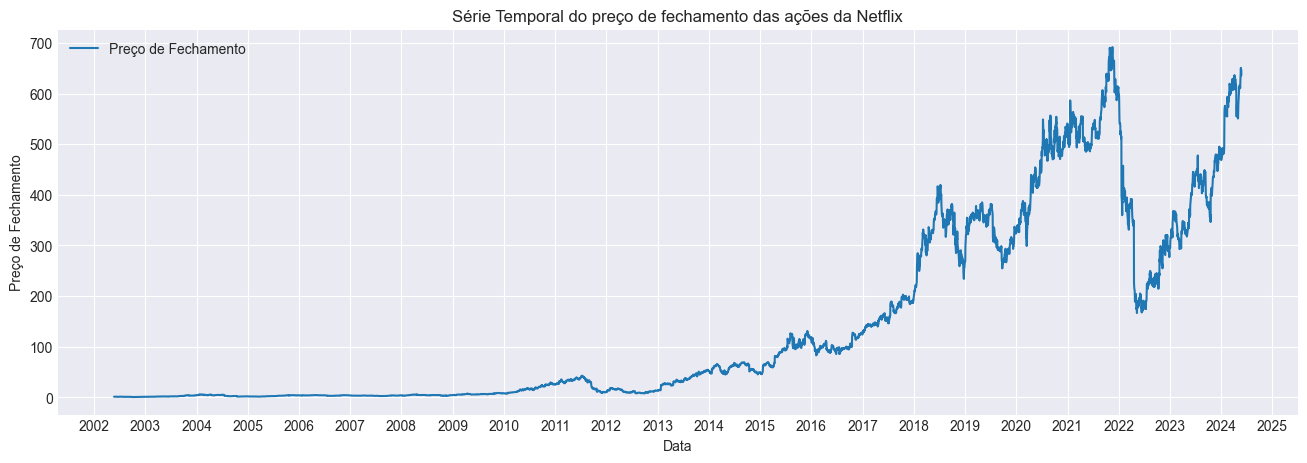

In [5]:
base_dados['Date'] = pd.to_datetime(base_dados['Date'])

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(16, 5))
plt.plot(base_dados['Date'], base_dados['Close'], label='Preço de Fechamento')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Série Temporal do preço de fechamento das ações da Netflix')
plt.legend()
plt.show()


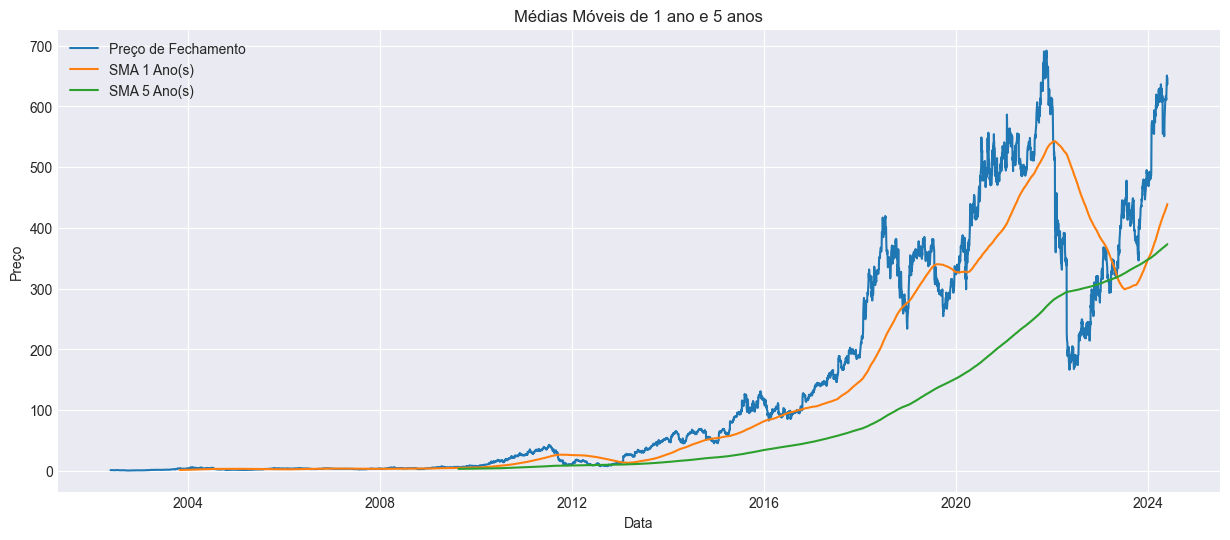

In [6]:
base_dados['SMA_1'] = base_dados['Close'].rolling(window=365).mean()
base_dados['SMA_5'] = base_dados['Close'].rolling(window=1825).mean()

plt.figure(figsize=(15, 6))
plt.plot(base_dados['Date'], base_dados['Close'], label='Preço de Fechamento')
plt.plot(base_dados['Date'], base_dados['SMA_1'], label='SMA 1 Ano(s)')
plt.plot(base_dados['Date'], base_dados['SMA_5'], label='SMA 5 Ano(s)')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.title('Médias Móveis de 1 ano e 5 anos')
plt.legend()
plt.show()

<Axes: xlabel='Ano', ylabel='Fechamento'>

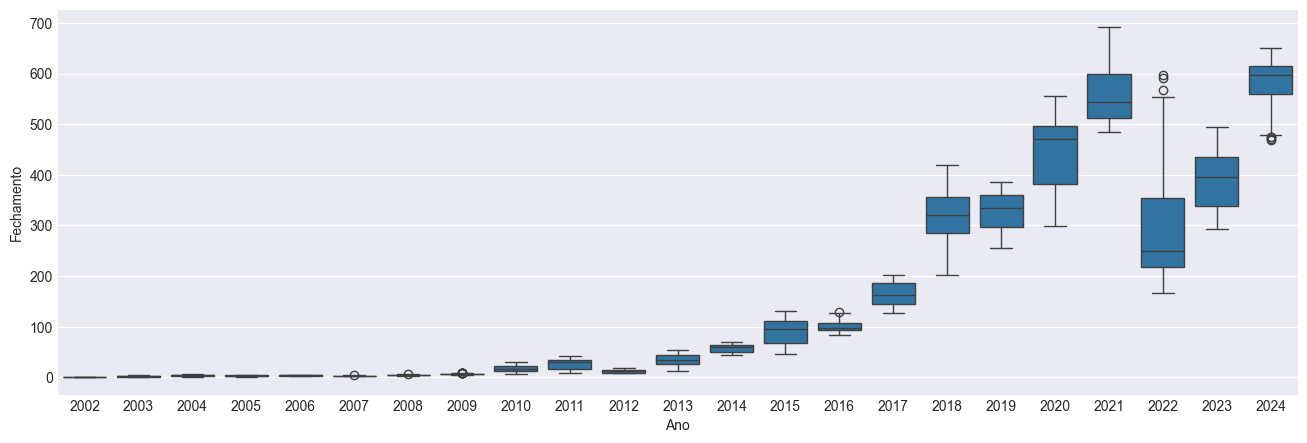

In [7]:
base_dados['Ano'] = base_dados['Date'].dt.year
base_dados.rename(columns={'Close': 'Fechamento'}, inplace=True)
plt.figure(figsize=(16, 5))
sns.boxplot(data=base_dados, x='Ano', y='Fechamento')

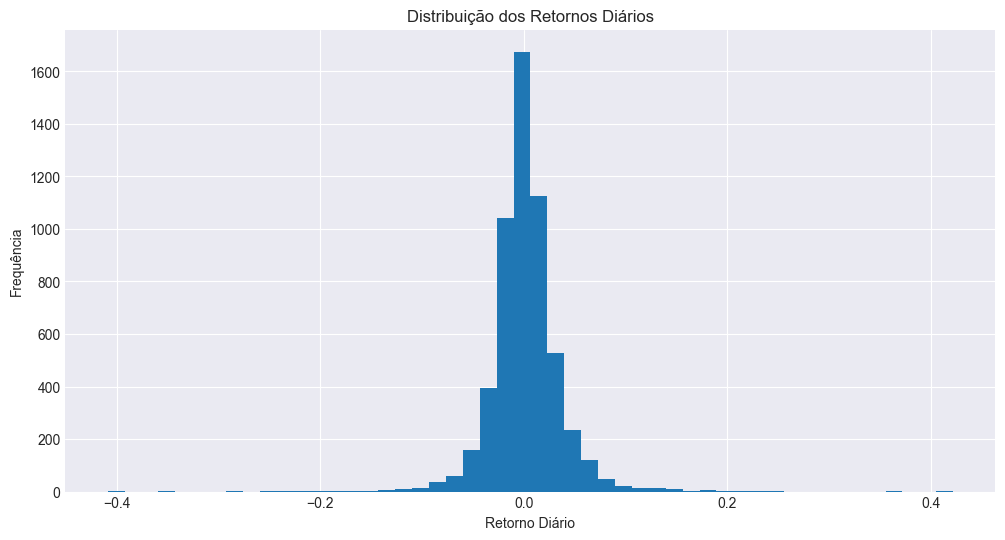

In [8]:
base_dados.rename(columns={'Fechamento': 'Close'}, inplace=True)
base_dados['Return'] = base_dados['Close'].pct_change()

plt.figure(figsize=(12, 6))
plt.hist(base_dados['Return'].dropna(), bins=50)
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.title('Distribuição dos Retornos Diários')
plt.show()

In [9]:
base_dados['Date'] = pd.to_datetime(base_dados['Date'])
base_dados['Ano'] = base_dados['Date'].dt.year
fechamento_anual = base_dados.groupby('Ano')['Close'].last().pct_change() * 100
print(fechamento_anual)

Ano
2002           NaN
2003    396.730029
2004    -54.909484
2005    119.464651
2006     -4.434575
2007      2.938890
2008     12.284001
2009     84.309133
2010    218.932656
2011    -60.563462
2012     33.626793
2013    297.634735
2014     -7.214057
2015    134.378372
2016      8.235711
2017     55.056545
2018     39.435296
2019     20.888441
2020     67.113752
2021     11.412354
2022    -51.052386
2023     65.111231
2024     32.835605
Name: Close, dtype: float64


In [10]:
fig = go.Figure(data=[go.Bar(x=fechamento_anual.index, y=fechamento_anual)])
fig.update_traces(hovertemplate='%{y:.2f}%')
fig.update_layout(
    xaxis_title='Ano',
    yaxis_title='Variação Percentual (%)',
    title='Variação Percentual Anual do Preço de Fechamento da Netflix'
)
fig.show()

In [11]:
base_dados['Date'] = pd.to_datetime(base_dados['Date'])

grafico = go.Figure(
    data=[
        go.Candlestick(
            x=base_dados['Date'],
            open=base_dados['Open'],
            high=base_dados['High'],
            low=base_dados['Low'],
            close=base_dados['Close'],
        )
    ]
)

grafico.update_layout(
    title='Gráfico Candlestick das Ações da Netflix',
    xaxis_title='Data',
    yaxis_title='Preço',
    xaxis_rangeslider_visible=False
)
grafico.show()

In [12]:
volume_por_ano = base_dados.groupby(base_dados['Date'].dt.year)['Volume'].sum()

tabela_volume_por_ano = pd.DataFrame(volume_por_ano)
tabela_volume_por_ano.reset_index(inplace=True)
tabela_volume_por_ano.columns = ['Ano', 'Volume de Negociação']

print(tabela_volume_por_ano)

     Ano  Volume de Negociação
0   2002             782530000
1   2003            4256021000
2   2004            6052356100
3   2005            2680477100
4   2006            2363327400
5   2007            2836393700
6   2008            2800814100
7   2009            2904000400
8   2010            7126840000
9   2011           11185849500
10  2012           10215947000
11  2013            6915790700
12  2014            4898415200
13  2015            4681123800
14  2016            3234743600
15  2017            1654091200
16  2018            2878875800
17  2019            1980147700
18  2020            1754276900
19  2021             986504500
20  2022            2729948900
21  2023            1600506800
22  2024             427893800


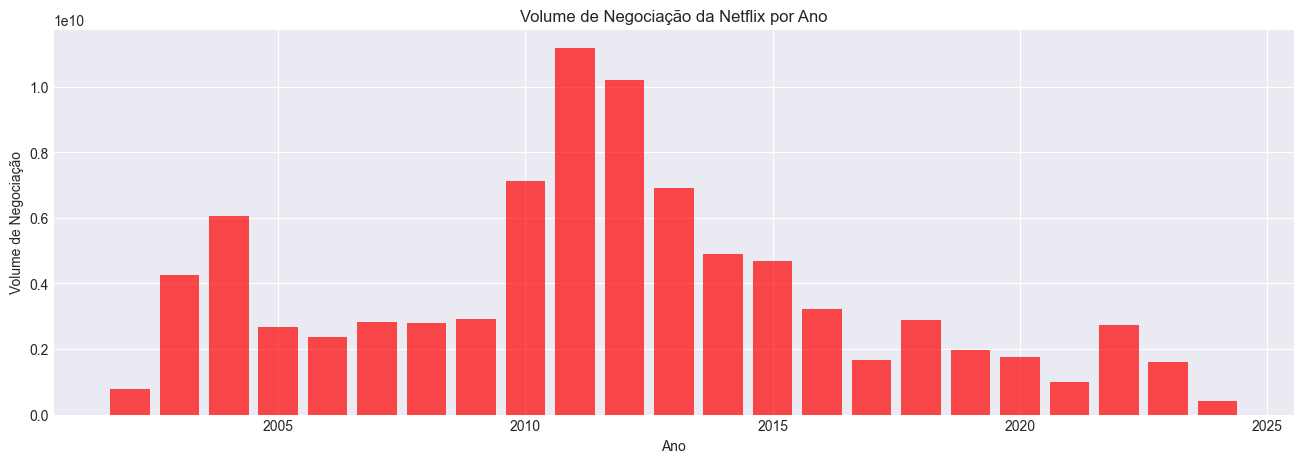

In [13]:
volume_por_ano = base_dados.groupby(base_dados['Date'].dt.year)['Volume'].sum()

plt.figure(figsize=(16, 5))
plt.bar(volume_por_ano.index, volume_por_ano, color='red', alpha=0.7)
plt.xlabel('Ano')
plt.ylabel('Volume de Negociação')
plt.title('Volume de Negociação da Netflix por Ano')
plt.grid(True)
plt.show()
